# Evaluation
The aim of the notebook is to compare what a NLP tool does when compared with manually annotated data.

We use the machine learning module Scikit-Learn (`sklearn`) since it offers many ready-to-use methods. This module is well known and widely used as it supports many machine learning algoritms.

In [43]:
import pandas as pd

import numpy as np
import requests
import json

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
text = None
with open('../resources/maj.txt') as f: 
    text = f.read()

# Deal only with part of the data
The poem is segmented into stanzas. In text, we recognize stanzas thanks to double enters (\n\n).

In [3]:
segments = text.split('\n\n')
segments[:3]

['1',
 'Byl pozdní večer – první máj –\nvečerní máj – byl lásky čas.\nHrdliččin zval ku lásce hlas,\nkde borový zaváněl háj.\nO lásce šeptal tichý mech;\nkvětoucí strom lhal lásky žel,\nsvou lásku slavík růži pěl,\nrůžinu jevil vonný vzdech.\nJezero hladké v křovích stinných\nzvučelo temně tajný bol,\nbřeh je objímal kol a kol;\na slunce jasná světů jiných\nbloudila blankytnými pásky,\nplanoucí tam co slzy lásky.',
 'I světy jich v oblohu skvoucí\nco ve chrám věčné lásky vzešly;\naž se – milostí k sobě vroucí\nzměnivše se v jiskry hasnoucí –\nbloudící co milenci sešly.\nOuplné lůny krásná tvář –\ntak bledě jasná, jasně bledá,\njak milence milenka hledá –\nve růžovou vzplanula zář;\nna vodách obrazy své zřela\na sama k sobě láskou mřela.\nDál blyštil bledý dvorů stín,\njenž k sobě šly vzdy blíž a blíž,\njak v objetí by níž a níž\nse vinuly v soumraku klín,\naž posléze šerem v jedno splynou.\nS nimi se stromy k stromům vinou. –\nNejzáze stíní šero hor,\ntam bříza k boru, k bříze bor\nse 

The first stanza is in segment n. 2 (counting starts at 0).

In [4]:
data = {"call": "tagger", 
        "lang": "cs",
        "output": "json",
        "text": segments[2].replace(';', ',')
       }
uri = "https://nlp.fi.muni.cz/languageservices/service.py"
r = requests.post(uri, data=data)
r

<Response [200]>

In [5]:
if r.status_code!=200:
    print(r.content)

In [6]:
data = r.json()
data

{'vertical': [['<s>'],
  ['I', 'i', 'k8xC'],
  ['světy', 'svět', 'k1gInPc1'],
  ['jich', 'on', 'k3xPp3gMnPc2'],
  ['v', 'v', 'k7c4'],
  ['oblohu', 'obloha', 'k1gFnSc4'],
  ['skvoucí', 'skvoucí', 'k2eAgFnSc4d1'],
  ['co', 'co', 'k8xS'],
  ['ve', 'v', 'k7c4'],
  ['chrám', 'chrám', 'k1gInSc4'],
  ['věčné', 'věčný', 'k2eAgFnSc2d1'],
  ['lásky', 'láska', 'k1gFnSc2'],
  ['vzešly', 'vzejít', 'k5eAaPmAgFnP'],
  ['<g/>'],
  [',', ',', 'kIx,'],
  ['až', 'až', 'k8xS'],
  ['se', 'se', 'k3xPyFc4'],
  ['–', '–', 'k?'],
  ['milostí', 'milost', 'k1gFnPc2'],
  ['k', 'k', 'k7c3'],
  ['sobě', 'se', 'k3xPyFc3'],
  ['vroucí', 'vroucí', 'k2eAgMnPc1d1'],
  ['změnivše', 'změnit', 'k5eAaPmDgInP'],
  ['se', 'se', 'k3xPyFc4'],
  ['v', 'v', 'k7c4'],
  ['jiskry', 'jiskra', 'k1gFnPc4'],
  ['hasnoucí', 'hasnoucí', 'k2eAgFnPc4d1'],
  ['–', '–', 'k?'],
  ['bloudící', 'bloudící', 'k2eAgMnPc1d1'],
  ['co', 'co', 'k9'],
  ['milenci', 'milenec', 'k1gMnPc1'],
  ['sešly', 'sejít', 'k5eAaPmAgInP'],
  ['<g/>'],
  ['.', '.', '

In [19]:
tokens = [token for token in data['vertical'] if len(token)==3]
df = pd.DataFrame.from_dict({"word": [word for word, lemma, tag in tokens], 
                              "lemma": [lemma for word, lemma, tag in tokens], 
                              "tag": [tag for word, lemma, tag in tokens]
                               })
pd.options.display.max_rows = len(df)
df

word      lemma           tag
0            I          i          k8xC
1        světy       svět      k1gInPc1
2         jich         on  k3xPp3gMnPc2
3            v          v          k7c4
4       oblohu     obloha      k1gFnSc4
5      skvoucí    skvoucí  k2eAgFnSc4d1
6           co         co          k8xS
7           ve          v          k7c4
8        chrám      chrám      k1gInSc4
9        věčné      věčný  k2eAgFnSc2d1
10       lásky      láska      k1gFnSc2
11      vzešly     vzejít  k5eAaPmAgFnP
12           ,          ,          kIx,
13          až         až          k8xS
14          se         se      k3xPyFc4
15           –          –            k?
16     milostí     milost      k1gFnPc2
17           k          k          k7c3
18        sobě         se      k3xPyFc3
19      vroucí     vroucí  k2eAgMnPc1d1
20    změnivše     změnit  k5eAaPmDgInP
21          se         se      k3xPyFc4
22           v          v          k7c4
23      jiskry     jiskra      k1gFnPc4
24    hasnoucí   hasnoucí  k2eAgFnPc4d1
25           –          –            k?
26    bloudící   bloudící  k2eAgMnPc1d1
27          co         co            k9
28     milenci    milenec      k1gMnPc1
29       sešly      sejít  k5eAaPmAgInP
30           .          .          kIx.
31      Ouplné     Ouplný  k2eAgFnPc4d1
32        lůny       lůno      k1gNnPc7
33      krásná     krásný  k2eAgFnSc1d1
34        tvář       tvář      k1gFnSc1
35           –          –            k?
36         tak        tak            k9
37       bledě      bledě        k6eAd1
38       jasná      jasný  k2eAgFnSc1d1
39           ,          ,          kIx,
40       jasně      jasně        k6eAd1
41       bledá      bledý  k2eAgFnSc1d1
42           ,          ,          kIx,
43         jak        jak     k8xC,k8xS
44     milence    milenka      k1gFnSc6
45     milenka    milenka      k1gFnSc1
46       hledá     hledat  k5eAaImIp3nS
47           –          –            k?
48          ve          v          k7c6
49     růžovou     růžový  k2eAgFnSc4d1
50   vzplanula  vzplanout  k5eAaPmAgFnS
51         zář        zář      k1gFnSc4
52           ,          ,          kIx,
53          na         na          k7c6
54      vodách       voda      k1gFnPc6
55      obrazy      obraz      k1gInPc4
56         své       svůj  k3xOyFgInPc4
57       zřela       zřít  k5eAaImAgFnS
58           a          a          k8xC
59        sama        sám    k3xTgFnSc1
60           k          k          k7c3
61        sobě         se      k3xPyFc3
62      láskou      láska      k1gFnSc7
63       mřela       mřít  k5eAaImAgNnP
64           .          .          kIx.
65         Dál     daleko        k6eAd2
66     blyštil    blyštit  k5eAaImAgInS
67       bledý      bledý  k2eAgInSc1d1
68       dvorů       dvůr      k1gInPc2
69        stín       stín      k1gInSc1
70           ,          ,          kIx,
71        jenž       jenž    k3xRgMnSc1
72           k          k          k7c3
73        sobě         se      k3xPyFc3
74         šly        jít  k5eAaImAgInP
75        vzdy       vzdy    k6eAd1xTwZ
76        blíž       blíž      k1gFnSc4
77           a          a          k8xC
78        blíž       blíž      k1gFnSc4
79           ,          ,          kIx,
80         jak        jak     k8xC,k8xS
81           v          v          k7c6
82      objetí     objetí      k1gNnSc6
83          by         by      kYmCp3nS
84         níž      nízce        k6eAd2
85           a          a          k8xC
86         níž      nízce        k6eAd2
87          se         se      k3xPyFc4
88      vinuly     vinout  k5eAaImAgInP
89           v          v          k7c6
90    soumraku    soumrak      k1gInSc6
91        klín       klín      k1gInSc4
92           ,          ,          kIx,
93          až         až          k8xS
94     posléze    posléze        k6eAd1
95       šerem       šero      k1gNnSc7
96           v          v          k7c4
97       jedno      jeden    k4xCgNnSc4
98     splynou   splynout  k5eAaPmIp3nP
99        

In [20]:
df['pos'] = df['tag'].str[:2]
df

word      lemma           tag pos
0            I          i          k8xC  k8
1        světy       svět      k1gInPc1  k1
2         jich         on  k3xPp3gMnPc2  k3
3            v          v          k7c4  k7
4       oblohu     obloha      k1gFnSc4  k1
5      skvoucí    skvoucí  k2eAgFnSc4d1  k2
6           co         co          k8xS  k8
7           ve          v          k7c4  k7
8        chrám      chrám      k1gInSc4  k1
9        věčné      věčný  k2eAgFnSc2d1  k2
10       lásky      láska      k1gFnSc2  k1
11      vzešly     vzejít  k5eAaPmAgFnP  k5
12           ,          ,          kIx,  kI
13          až         až          k8xS  k8
14          se         se      k3xPyFc4  k3
15           –          –            k?  k?
16     milostí     milost      k1gFnPc2  k1
17           k          k          k7c3  k7
18        sobě         se      k3xPyFc3  k3
19      vroucí     vroucí  k2eAgMnPc1d1  k2
20    změnivše     změnit  k5eAaPmDgInP  k5
21          se         se      k3xPyFc4  k3
22           v          v          k7c4  k7
23      jiskry     jiskra      k1gFnPc4  k1
24    hasnoucí   hasnoucí  k2eAgFnPc4d1  k2
25           –          –            k?  k?
26    bloudící   bloudící  k2eAgMnPc1d1  k2
27          co         co            k9  k9
28     milenci    milenec      k1gMnPc1  k1
29       sešly      sejít  k5eAaPmAgInP  k5
30           .          .          kIx.  kI
31      Ouplné     Ouplný  k2eAgFnPc4d1  k2
32        lůny       lůno      k1gNnPc7  k1
33      krásná     krásný  k2eAgFnSc1d1  k2
34        tvář       tvář      k1gFnSc1  k1
35           –          –            k?  k?
36         tak        tak            k9  k9
37       bledě      bledě        k6eAd1  k6
38       jasná      jasný  k2eAgFnSc1d1  k2
39           ,          ,          kIx,  kI
40       jasně      jasně        k6eAd1  k6
41       bledá      bledý  k2eAgFnSc1d1  k2
42           ,          ,          kIx,  kI
43         jak        jak     k8xC,k8xS  k8
44     milence    milenka      k1gFnSc6  k1
45     milenka    milenka      k1gFnSc1  k1
46       hledá     hledat  k5eAaImIp3nS  k5
47           –          –            k?  k?
48          ve          v          k7c6  k7
49     růžovou     růžový  k2eAgFnSc4d1  k2
50   vzplanula  vzplanout  k5eAaPmAgFnS  k5
51         zář        zář      k1gFnSc4  k1
52           ,          ,          kIx,  kI
53          na         na          k7c6  k7
54      vodách       voda      k1gFnPc6  k1
55      obrazy      obraz      k1gInPc4  k1
56         své       svůj  k3xOyFgInPc4  k3
57       zřela       zřít  k5eAaImAgFnS  k5
58           a          a          k8xC  k8
59        sama        sám    k3xTgFnSc1  k3
60           k          k          k7c3  k7
61        sobě         se      k3xPyFc3  k3
62      láskou      láska      k1gFnSc7  k1
63       mřela       mřít  k5eAaImAgNnP  k5
64           .          .          kIx.  kI
65         Dál     daleko        k6eAd2  k6
66     blyštil    blyštit  k5eAaImAgInS  k5
67       bledý      bledý  k2eAgInSc1d1  k2
68       dvorů       dvůr      k1gInPc2  k1
69        stín       stín      k1gInSc1  k1
70           ,          ,          kIx,  kI
71        jenž       jenž    k3xRgMnSc1  k3
72           k          k          k7c3  k7
73        sobě         se      k3xPyFc3  k3
74         šly        jít  k5eAaImAgInP  k5
75        vzdy       vzdy    k6eAd1xTwZ  k6
76        blíž       blíž      k1gFnSc4  k1
77           a          a          k8xC  k8
78        blíž       blíž      k1gFnSc4  k1
79           ,          ,          kIx,  kI
80         jak        jak     k8xC,k8xS  k8
81           v          v          k7c6  k7
82      objetí     objetí      k1gNnSc6  k1
83          by         by      kYmCp3nS  kY
84         níž      nízce        k6eAd2  k6
85           a          a          k8xC  k8
86         níž      nízce        k6eAd2  k6
87          se         se      k3xPyFc4  k3
88      vinuly     vinout  k5eAaImAgInP  k5
89           v          v          k7c6  k7
90    

In [21]:
annotations = [(k, '') for k in df['word'].values]
annotations

[('I', ''),
 ('světy', ''),
 ('jich', ''),
 ('v', ''),
 ('oblohu', ''),
 ('skvoucí', ''),
 ('co', ''),
 ('ve', ''),
 ('chrám', ''),
 ('věčné', ''),
 ('lásky', ''),
 ('vzešly', ''),
 (',', ''),
 ('až', ''),
 ('se', ''),
 ('–', ''),
 ('milostí', ''),
 ('k', ''),
 ('sobě', ''),
 ('vroucí', ''),
 ('změnivše', ''),
 ('se', ''),
 ('v', ''),
 ('jiskry', ''),
 ('hasnoucí', ''),
 ('–', ''),
 ('bloudící', ''),
 ('co', ''),
 ('milenci', ''),
 ('sešly', ''),
 ('.', ''),
 ('Ouplné', ''),
 ('lůny', ''),
 ('krásná', ''),
 ('tvář', ''),
 ('–', ''),
 ('tak', ''),
 ('bledě', ''),
 ('jasná', ''),
 (',', ''),
 ('jasně', ''),
 ('bledá', ''),
 (',', ''),
 ('jak', ''),
 ('milence', ''),
 ('milenka', ''),
 ('hledá', ''),
 ('–', ''),
 ('ve', ''),
 ('růžovou', ''),
 ('vzplanula', ''),
 ('zář', ''),
 (',', ''),
 ('na', ''),
 ('vodách', ''),
 ('obrazy', ''),
 ('své', ''),
 ('zřela', ''),
 ('a', ''),
 ('sama', ''),
 ('k', ''),
 ('sobě', ''),
 ('láskou', ''),
 ('mřela', ''),
 ('.', ''),
 ('Dál', ''),
 ('blyštil', '

In [22]:
df[df.pos=='k3']

word  lemma           tag pos
2     jich     on  k3xPp3gMnPc2  k3
14      se     se      k3xPyFc4  k3
18    sobě     se      k3xPyFc3  k3
21      se     se      k3xPyFc4  k3
56     své   svůj  k3xOyFgInPc4  k3
59    sama    sám    k3xTgFnSc1  k3
61    sobě     se      k3xPyFc3  k3
71    jenž   jenž    k3xRgMnSc1  k3
73    sobě     se      k3xPyFc3  k3
87      se     se      k3xPyFc4  k3
101   nimi     on  k3xPp3gFnPc7  k3
102     se     se      k3xPyFc4  k3
122     se     se      k3xPyFc4  k3
139  každý  každý    k3xTgMnSc1  k3

# Manual annotation

**TASK 1** Copy the previous output in a new variable. Fill the empty values by the following codes for part-of-speech:

* kI - punctuation
* k1 - noun
* k2 - adjective
* k3 - pronoun
* k4 - numeral
* k5 - verb
* k6 - adverb
* k7 - preposition
* k8 - conjunction
* k9 - particle
* k0 - interjection
* k? - unknown

In [28]:
annotations =  [('I', 'k9'),
 ('světy', 'k1'),
 ('jich', 'k3'),
 ('v', 'k7'),
 ('oblohu', 'k1'),
 ('skvoucí', 'k2'),
 ('co', ''),  # continue with annotations here
 ('ve', ''),
 ('chrám', ''),
 ('věčné', ''),
 ('lásky', ''),
 ('vzešly', ''),
 (',', ''),
 ('až', ''),
 ('se', ''),
 ('–', ''),
 ('milostí', ''),
 ('k', ''),
 ('sobě', ''),
 ('vroucí', ''),
 ('změnivše', ''),
 ('se', ''),
 ('v', ''),
 ('jiskry', ''),
 ('hasnoucí', ''),
 ('–', ''),
 ('bloudící', ''),
 ('co', ''),
 ('milenci', ''),
 ('sešly', ''),
 ('.', ''),
 ('Ouplné', ''),
 ('lůny', ''),
 ('krásná', ''),
 ('tvář', ''),
 ('–', ''),
 ('tak', ''),
 ('bledě', ''),
 ('jasná', ''),
 (',', ''),
 ('jasně', ''),
 ('bledá', ''),
 (',', ''),
 ('jak', ''),
 ('milence', ''),
 ('milenka', ''),
 ('hledá', ''),
 ('–', ''),
 ('ve', ''),
 ('růžovou', ''),
 ('vzplanula', ''),
 ('zář', ''),
 (',', ''),
 ('na', ''),
 ('vodách', ''),
 ('obrazy', ''),
 ('své', ''),
 ('zřela', ''),
 ('a', ''),
 ('sama', ''),
 ('k', ''),
 ('sobě', ''),
 ('láskou', ''),
 ('mřela', ''),
 ('.', ''),
 ('Dál', ''),
 ('blyštil', ''),
 ('bledý', ''),
 ('dvorů', ''),
 ('stín', ''),
 (',', ''),
 ('jenž', ''),
 ('k', ''),
 ('sobě', ''),
 ('šly', ''),
 ('vzdy', ''),
 ('blíž', ''),
 ('a', ''),
 ('blíž', ''),
 (',', ''),
 ('jak', ''),
 ('v', ''),
 ('objetí', ''),
 ('by', ''),
 ('níž', ''),
 ('a', ''),
 ('níž', ''),
 ('se', ''),
 ('vinuly', ''),
 ('v', ''),
 ('soumraku', ''),
 ('klín', ''),
 (',', ''),
 ('až', ''),
 ('posléze', ''),
 ('šerem', ''),
 ('v', ''),
 ('jedno', ''),
 ('splynou', ''),
 ('.', ''),
 ('S', ''),
 ('nimi', ''),
 ('se', ''),
 ('stromy', ''),
 ('k', ''),
 ('stromům', ''),
 ('vinou', ''),
 ('.', ''),
 ('–', ''),
 ('Nejzáze', ''),
 ('stíní', ''),
 ('šero', ''),
 ('hor', ''),
 (',', ''),
 ('tam', ''),
 ('bříza', ''),
 ('k', ''),
 ('boru', ''),
 (',', ''),
 ('k', ''),
 ('bříze', ''),
 ('bor', ''),
 ('se', ''),
 ('kloní', ''),
 ('.', ''),
 ('Vlna', ''),
 ('za', ''),
 ('vlnou', ''),
 ('potokem', ''),
 ('spěchá', ''),
 ('.', ''),
 ('Vře', ''),
 ('plnou', ''),
 ('–', ''),
 ('v', ''),
 ('čas', ''),
 ('lásky', ''),
 ('–', ''),
 ('láskou', ''),
 ('každý', ''),
 ('tvor', ''),
 ('.', '')]

In [29]:
labels = sorted(set(df.pos.values))
labels

['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k?', 'kI', 'kY']

In [30]:
annotations

[('I', 'k9'),
 ('světy', 'k1'),
 ('jich', 'k3'),
 ('v', 'k7'),
 ('oblohu', 'k1'),
 ('skvoucí', 'k2'),
 ('co', ''),
 ('ve', ''),
 ('chrám', ''),
 ('věčné', ''),
 ('lásky', ''),
 ('vzešly', ''),
 (',', ''),
 ('až', ''),
 ('se', ''),
 ('–', ''),
 ('milostí', ''),
 ('k', ''),
 ('sobě', ''),
 ('vroucí', ''),
 ('změnivše', ''),
 ('se', ''),
 ('v', ''),
 ('jiskry', ''),
 ('hasnoucí', ''),
 ('–', ''),
 ('bloudící', ''),
 ('co', ''),
 ('milenci', ''),
 ('sešly', ''),
 ('.', ''),
 ('Ouplné', ''),
 ('lůny', ''),
 ('krásná', ''),
 ('tvář', ''),
 ('–', ''),
 ('tak', ''),
 ('bledě', ''),
 ('jasná', ''),
 (',', ''),
 ('jasně', ''),
 ('bledá', ''),
 (',', ''),
 ('jak', ''),
 ('milence', ''),
 ('milenka', ''),
 ('hledá', ''),
 ('–', ''),
 ('ve', ''),
 ('růžovou', ''),
 ('vzplanula', ''),
 ('zář', ''),
 (',', ''),
 ('na', ''),
 ('vodách', ''),
 ('obrazy', ''),
 ('své', ''),
 ('zřela', ''),
 ('a', ''),
 ('sama', ''),
 ('k', ''),
 ('sobě', ''),
 ('láskou', ''),
 ('mřela', ''),
 ('.', ''),
 ('Dál', ''),
 (

In [31]:
len(annotations)

142

In [32]:
len(df.pos)

142

In [33]:
#confusion_matrix_ = confusion_matrix([v for k,v in annotations], df.pos, labels=labels, normalize='all')
confusion_matrix_ = confusion_matrix([v for k,v in annotations], df.pos, labels=labels)

In [34]:
confusion_matrix_

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<AxesSubplot:>

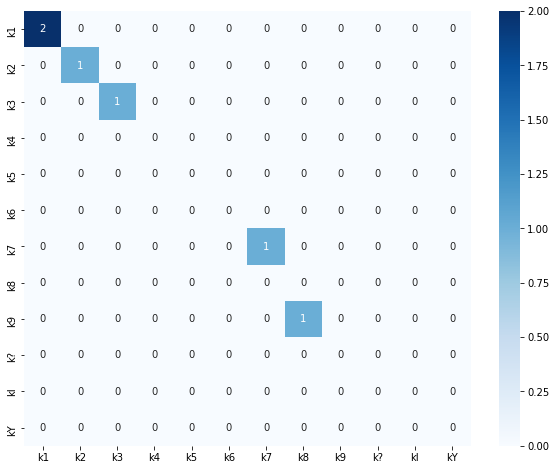

In [35]:
cm = pd.DataFrame(confusion_matrix_, index = labels, columns= labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues')

**TASK 2** Observe the confusion matrix. What part-of-speech are the most frequent? What POS are the most problematic?

In [44]:
print(classification_report([v for k,v in annotations], df.pos))

              precision    recall  f1-score   support

                   0.00      0.00      0.00       136
          k1       0.05      1.00      0.10         2
          k2       0.08      1.00      0.15         1
          k3       0.07      1.00      0.13         1
          k4       0.00      0.00      0.00         0
          k5       0.00      0.00      0.00         0
          k6       0.00      0.00      0.00         0
          k7       0.06      1.00      0.11         1
          k8       0.00      0.00      0.00         0
          k9       0.00      0.00      0.00         1
          k?       0.00      0.00      0.00         0
          kI       0.00      0.00      0.00         0
          kY       0.00      0.00      0.00         0

    accuracy                           0.04       142
   macro avg       0.02      0.31      0.04       142
weighted avg       0.00      0.04      0.00       142



/home/zuzana/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zuzana/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zuzana/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zuzana/.local/lib/python3.8/site-packages/

**TASK 3** Observe the classification report. What is does the precision and recall mean? What is support?